<a href="https://colab.research.google.com/github/priyanships31/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [395]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RepeatedStratifiedKFold,RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, recall_score, f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
%matplotlib inline
from itertools import combinations
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
 

In [396]:
# !pip install matplotlib

In [397]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/Capstone Project/data_mobile_price_range.csv')

In [398]:

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### From the data we see that some values are categorical in nature such as blue,dual_sim,four_g,three_g, touch_screen, wifi represented as 0 and 1

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [400]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [401]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [402]:
df1 = df.groupby(by = 'price_range').count()

In [403]:
df1.T

price_range,0,1,2,3
battery_power,500,500,500,500
blue,500,500,500,500
clock_speed,500,500,500,500
dual_sim,500,500,500,500
fc,500,500,500,500
four_g,500,500,500,500
int_memory,500,500,500,500
m_dep,500,500,500,500
mobile_wt,500,500,500,500
n_cores,500,500,500,500


### From this data we can coclude that our dataset is balanced for all the 4 classes

## Detecting and removing outliers if any

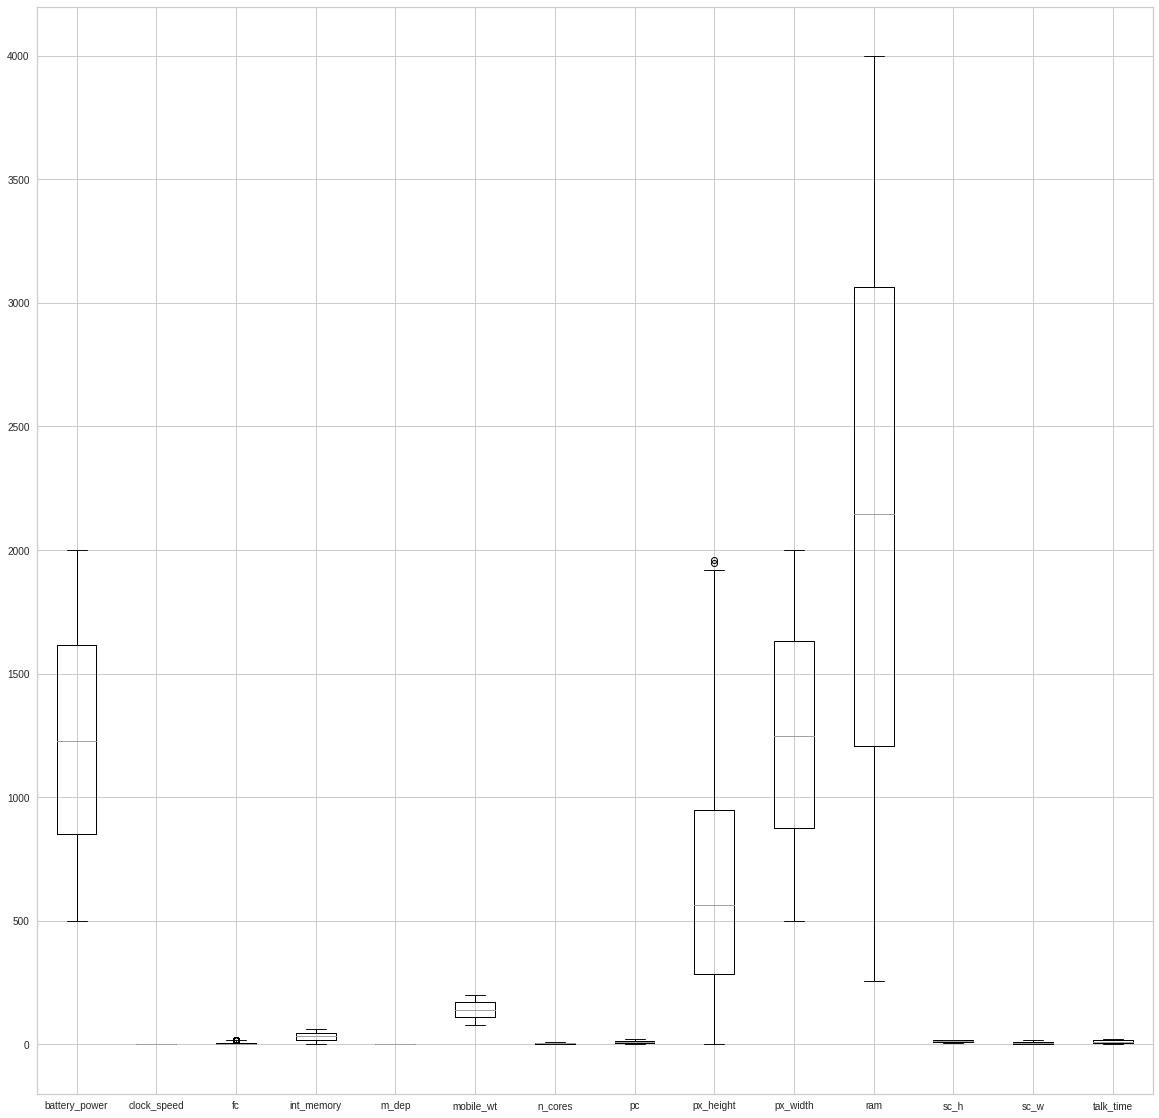

In [404]:
fig = plt.figure(figsize =(20, 20))
data = ['battery_power', 'clock_speed', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
# Creating plot
# plt.boxplot(data)
boxplot = df.boxplot(column=['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])

# show plot
plt.show()

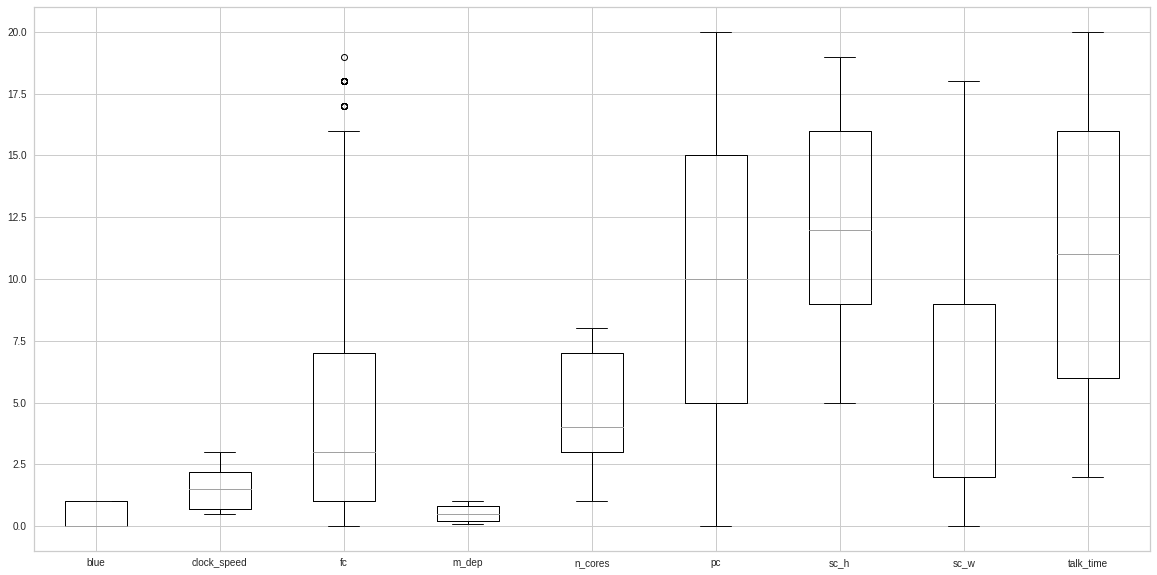

In [405]:
fig = plt.figure(figsize =(20, 10))


boxplot = df.boxplot(column=['blue','clock_speed', 'fc','m_dep','n_cores','pc','sc_h','sc_w','talk_time'])
plt.show()

We can see that we have outliers in px_height and fc

In [406]:
new_df = df.copy()

In [407]:
# def outlier_treatment(datacolumn):
#  sorted(datacolumn)
#  Q1,Q3 = np.percentile(datacolumn , [25,75])
#  IQR = Q3 — Q1
#  lower_range = Q1 — (1.5 * IQR)
#  upper_range = Q3 + (1.5 * IQR)
#  return lower_range,upper_range

In [408]:
# Q1 = new_df["fc"].quantile(0.25)
Q3 = new_df['fc'].quantile(0.991)
# IQR = Q3-Q1

new_df = new_df[(new_df['fc'] <= Q3)]


In [409]:
new_df.shape

(1982, 21)

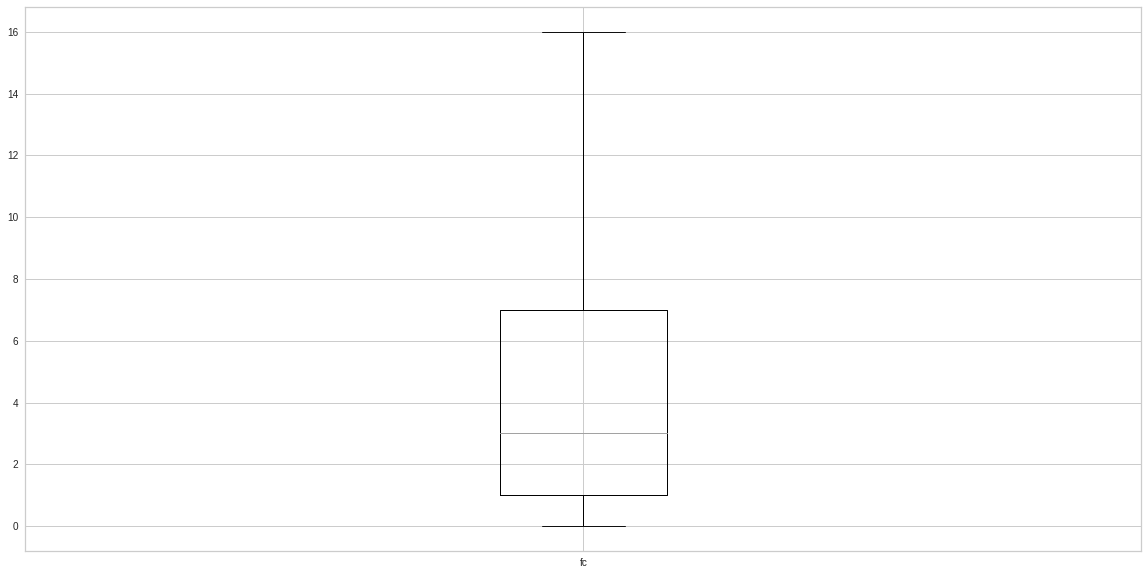

In [410]:
fig = plt.figure(figsize =(20, 10))


boxplot = new_df.boxplot(column=['fc'])
plt.show()

In [411]:
Q3 = new_df['px_height'].quantile(0.999)

new_df = new_df[(new_df['px_height'] <= Q3)]

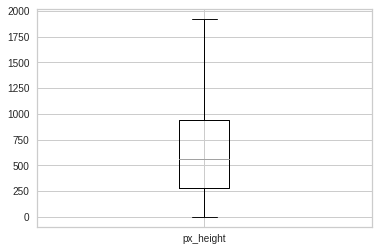

In [412]:
boxplot = new_df.boxplot(column=['px_height'])

# show plot
plt.show()

In [413]:
new_df.shape

(1980, 21)

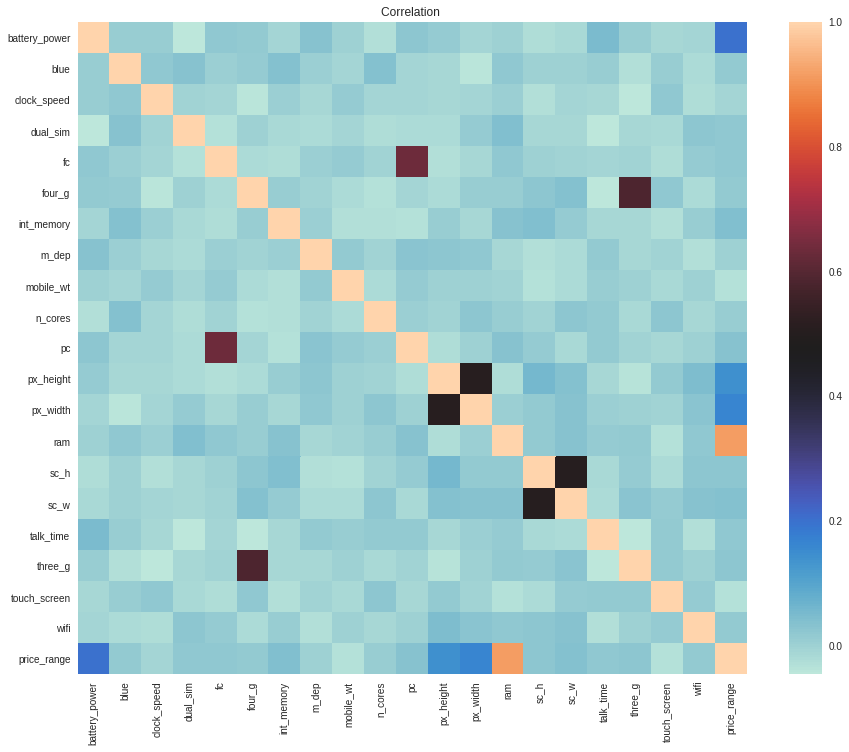

In [414]:
# Finding correlation in our data

import seaborn as sns
import matplotlib.pyplot as plt
corr=new_df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='icefire')
r.set_title("Correlation ")
plt.show()

### Selecting important features

In [415]:
# for categorical response and categorical predictor

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# data = pd.read_csv("D://Blogs//train.csv")
X = new_df[['blue','dual_sim','four_g','three_g', 'touch_screen', 'wifi']]  #independent columns
y = new_df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(21,'Score')) 

          Specs     Score
4  touch_screen  2.000355
2        four_g  1.853379
1      dual_sim  0.600599
0          blue  0.479060
5          wifi  0.403716
3       three_g  0.352030


In [416]:
# For categorical response and continuous predictor
X = new_df[['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
y = new_df.iloc[:,-1] 

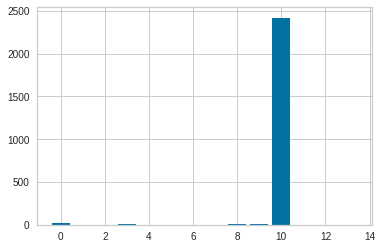

            Specs        Score
10            ram  2419.443534
0   battery_power    24.641800
9        px_width    13.718777
8       px_height    10.426165
3      int_memory     4.066940
4           m_dep     2.673142
5       mobile_wt     1.980453
13      talk_time     1.902398
12           sc_w     1.483696
11           sc_h     1.160781
6         n_cores     0.769897
7              pc     0.636563
1     clock_speed     0.584822
2              fc     0.509259


In [417]:

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
# X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
# for i in range(len(fs.scores_)):
# 	print('Feature %d: %f' % (i, fs.scores_[i]))
dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(X.columns)
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
# print(featureScores)
print(featureScores.nlargest(21,'Score')) 

# Exploratory Data Analysis

### Categorical Variables

In [418]:
categorical_variables = ['blue','dual_sim','four_g','three_g', 'touch_screen', 'wifi','n_cores']

####Bluetooth

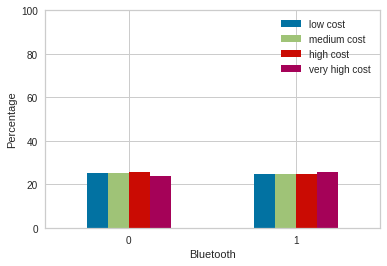

In [419]:
freq_df = new_df.groupby('price_range')['blue'].value_counts().unstack(0)
freq_df.columns = ['low cost', 'medium cost', 'high cost','very high cost']

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)

plt.ylabel('Percentage')
plt.xlabel('Bluetooth')
plt.xticks(rotation=0)
plt.show();


In [420]:
freq_df.index

Int64Index([0, 1], dtype='int64', name='blue')

#### Dual Sim

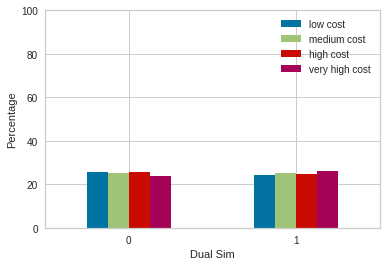

In [421]:
freq_df = new_df.groupby('price_range')['dual_sim'].value_counts().unstack(0)
freq_df.columns = ['low cost', 'medium cost', 'high cost','very high cost']

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.xlabel('Dual Sim')

plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

####Four G

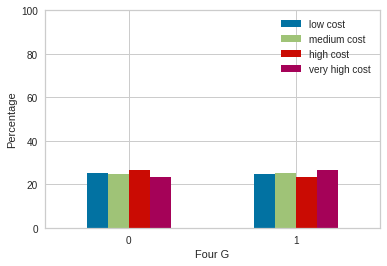

In [422]:
freq_df = new_df.groupby('price_range')['four_g'].value_counts().unstack(0)
freq_df.columns = ['low cost', 'medium cost', 'high cost','very high cost']

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.xlabel('Four G')

plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

####Three G

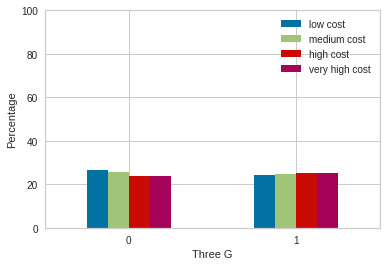

In [423]:
freq_df = new_df.groupby('price_range')['three_g'].value_counts().unstack(0)
freq_df.columns = ['low cost', 'medium cost', 'high cost','very high cost']

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.xlabel('Three G')

plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

####Touch Screen

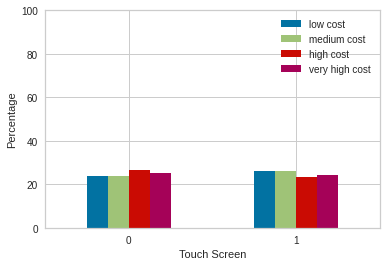

In [424]:
freq_df = new_df.groupby('price_range')['touch_screen'].value_counts().unstack(0)
freq_df.columns = ['low cost', 'medium cost', 'high cost','very high cost']

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.xlabel('Touch Screen')

plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

####WiFi

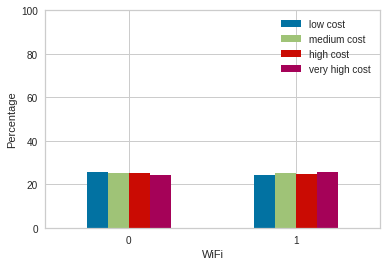

In [425]:
freq_df = new_df.groupby('price_range')['wifi'].value_counts().unstack(0)
freq_df.columns = ['low cost', 'medium cost', 'high cost','very high cost']

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.xlabel('WiFi')

plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

### N Cores

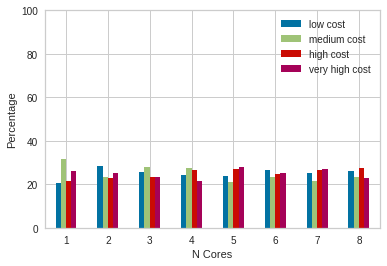

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [426]:
freq_df = new_df.groupby('price_range')['n_cores'].value_counts().unstack(0)
freq_df.columns = ['low cost', 'medium cost', 'high cost','very high cost']
# plt.figure(figsize = (12,12))

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.xlabel('N Cores')

plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()
plt.figure(figsize = (12,12))


### Checking correlation amongst the categorical variables

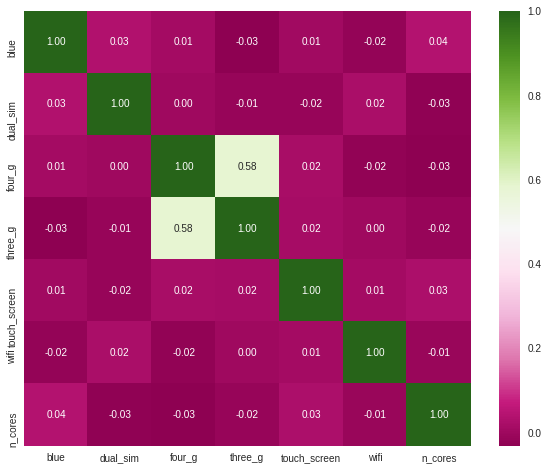

In [427]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df[categorical_variables].corr(), annot=True, fmt=".2f", cmap = 'PiYG');

#### Finding VIF factor

In [428]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [429]:
calc_vif(new_df[categorical_variables])

,variables,VIF
0,blue,1.843478
1,dual_sim,1.857770
2,four_g,3.180902
3,three_g,5.222570
4,touch_screen,1.870131
5,wifi,1.853414
6,n_cores,3.338972


Creating new feature for highly correlated variables

In [430]:
# conditions = []
new_df['3G 4G'] = new_df['four_g'] | new_df['three_g']
# new_df['3G 4G'] = new_df.apply (lambda row: label(row), axis=1)


In [431]:
new_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', '3G 4G'],
      dtype='object')

In [432]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

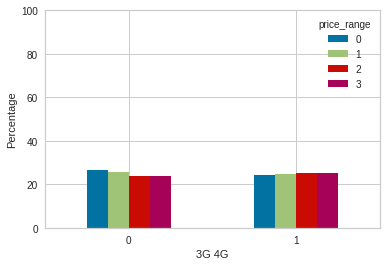

In [433]:
freq_df = new_df.groupby('price_range')['3G 4G'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

In [434]:
new_categorical_variables = ['blue','dual_sim','3G 4G', 'touch_screen', 'wifi','n_cores']

#### We can see that both four_g and three_g are highly correlated

## Continuous Variables

In [435]:
new_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', '3G 4G'],
      dtype='object')

In [436]:
continuous_variables = ['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt','pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','price_range']

### How continuous variables are affected by price range?

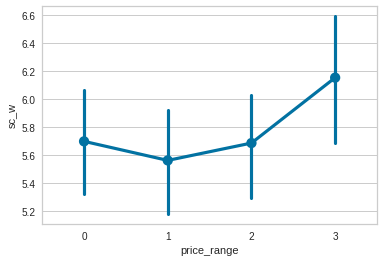

In [437]:
sns.pointplot(y="sc_w", x="price_range", data=new_df)


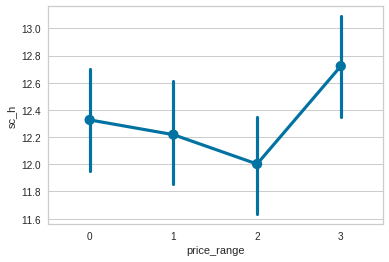

In [438]:
sns.pointplot(y="sc_h", x="price_range", data=new_df)


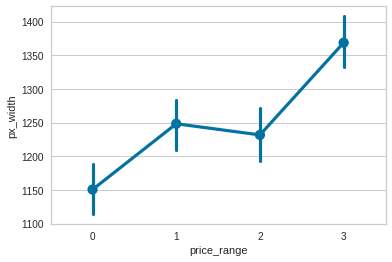

In [439]:
sns.pointplot(y="px_width", x="price_range", data=new_df)


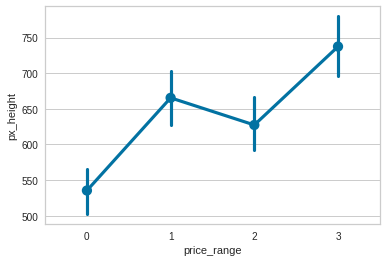

In [440]:
sns.pointplot(y="px_height", x="price_range", data=new_df)


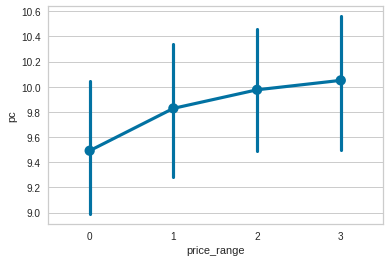

In [441]:
sns.pointplot(y="pc", x="price_range", data=new_df)


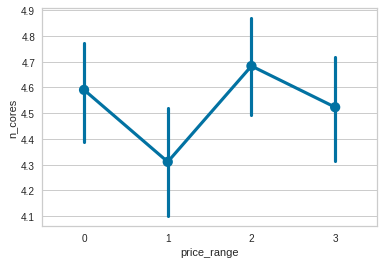

In [442]:
sns.pointplot(y="n_cores", x="price_range", data=new_df)


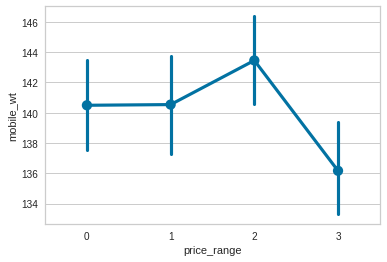

In [443]:
sns.pointplot(y="mobile_wt", x="price_range", data=new_df)


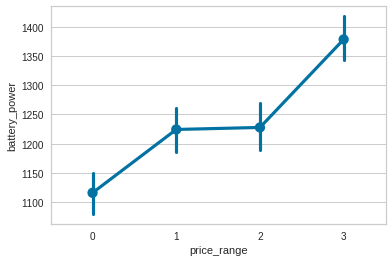

In [444]:
sns.pointplot(y="battery_power", x="price_range", data=new_df)


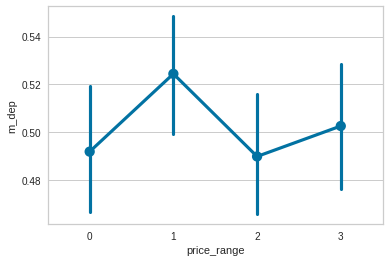

In [445]:
# df.plot(x='price_range', y='battery_power', kind='scatter')
# plt.show()

sns.pointplot(y="m_dep", x="price_range", data=new_df)


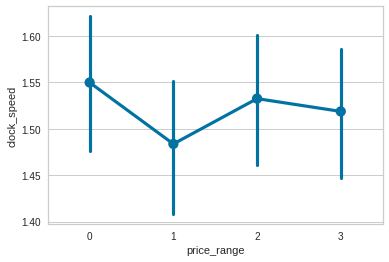

In [446]:
# df.plot(x='price_range', y='clock_speed', kind='scatter')
# plt.show()
sns.pointplot(y="clock_speed", x="price_range", data=new_df)


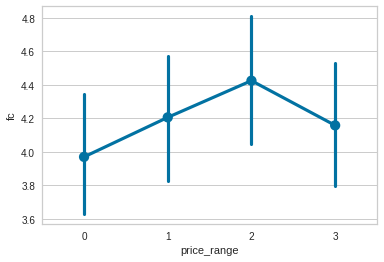

In [447]:
# df.plot(x='price_range', y='fc', kind='scatter')
# plt.show()

sns.pointplot(y="fc", x="price_range", data=new_df)


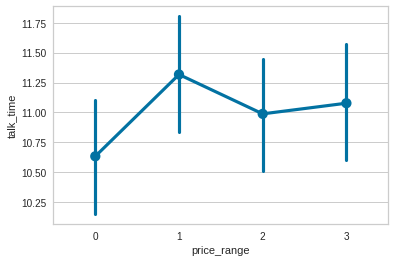

In [448]:
sns.pointplot(y="talk_time", x="price_range", data=new_df)


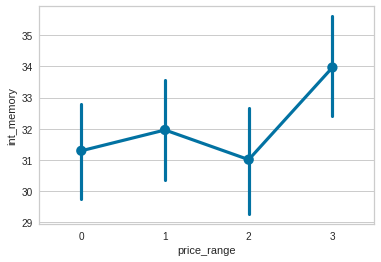

In [449]:
sns.pointplot(y="int_memory", x="price_range", data=new_df)


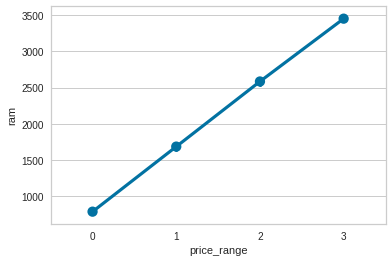

In [450]:
# plt.figure(figsize=(20,10))
sns.pointplot(y="ram", x="price_range", data=new_df)
plt.show()

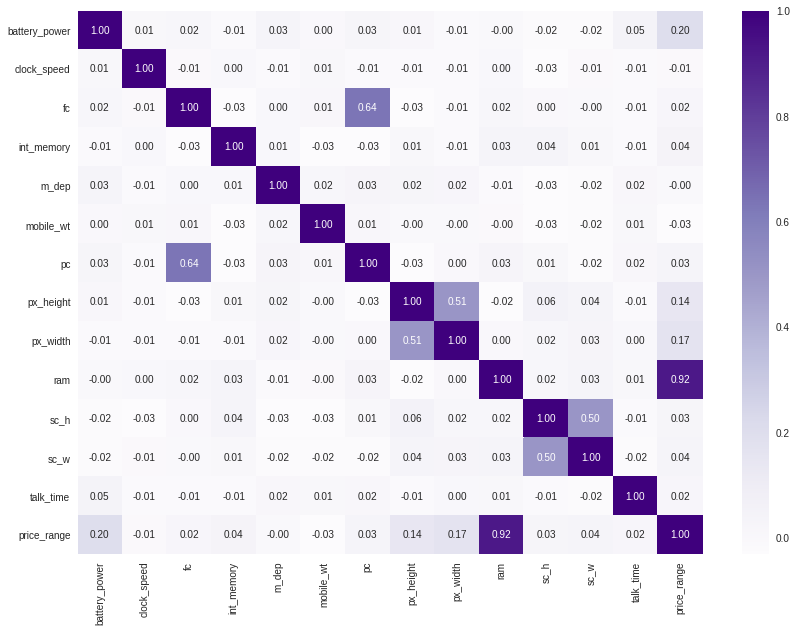

In [451]:
plt.figure(figsize=(14,10))
sns.heatmap(new_df[continuous_variables].corr(), annot=True, fmt=".2f",cmap = 'Purples');


In [452]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [453]:
calc_vif(new_df[continuous_variables])

,variables,VIF
0,battery_power,9.349493
1,clock_speed,4.316060
2,fc,3.379536
3,int_memory,3.958702
4,m_dep,3.938602
5,mobile_wt,14.416305
6,pc,6.106546
7,px_height,4.573888
8,px_width,11.453119
9,ram,37.042677


High correlation between:

pc and fc around 0.6

px_width and px_height around 0.5

sc_h and sc_w around 0.5

price_range and ram around 0.9

### Creating new features with high correlation

In [454]:
# new_df['total cam pixels'] = df['pc'] + df['fc']

In [455]:
new_df['area'] = (new_df['sc_h']*new_df['sc_w'])**0.5

In [456]:
new_df['pixel_area'] = (new_df['px_height']*new_df['px_width'])**0.5

In [457]:
new_continuous_variables = ['battery_power','clock_speed', 'pc','fc','area','pixel_area',
       'int_memory', 'm_dep', 'mobile_wt',  'ram', 'talk_time','price_range']

In [458]:
new_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', '3G 4G', 'area', 'pixel_area'],
      dtype='object')

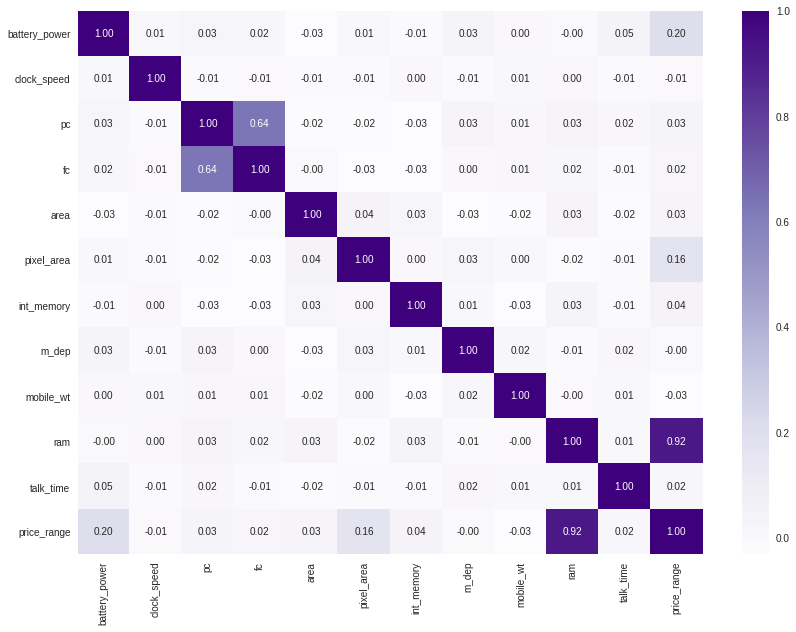

In [459]:
plt.figure(figsize=(14,10))
sns.heatmap(new_df[new_continuous_variables].corr(), annot=True, fmt=".2f",cmap = 'Purples');

In [460]:
# fig = plt.figure(figsize =(10, 10))
# boxplot = df.boxplot(column=['blue'])

# plt.show()

## Splitting the data

In [461]:
new_df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', '3G 4G', 'area', 'pixel_area'],
      dtype='object')

In [462]:
new_df[new_continuous_variables].columns

Index(['battery_power', 'clock_speed', 'pc', 'fc', 'area', 'pixel_area',
       'int_memory', 'm_dep', 'mobile_wt', 'ram', 'talk_time', 'price_range'],
      dtype='object')

In [463]:
new_df[new_categorical_variables].columns

Index(['blue', 'dual_sim', '3G 4G', 'touch_screen', 'wifi', 'n_cores'], dtype='object')

In [464]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler


import pandas as pd

lab_enc = preprocessing.LabelEncoder()
# scaler = StandardScaler()
# scaler = preprocessing.StandardScaler().fit(X_train)



# # housing = pd.read_csv("/content/sample_data/california_housing_train.csv")
# d = preprocessing.normalize(new_df[new_continuous_variables])
# scaled_df1 = pd.DataFrame(d, columns = ['battery_power', 'clock_speed', 'pc', 'fc', 'area', 'pixel_area',
#        'int_memory', 'm_dep', 'mobile_wt', 'ram', 'talk_time', 'price_range'])
# d1 = preprocessing.normalize(new_df[new_categorical_variables])
# scaled_df2 =  pd.DataFrame(d1, columns =['blue', 'dual_sim', '3G 4G', 'touch_screen', 'wifi', 'n_cores'])
# # scaled_df.head()/

In [465]:
X = new_df.drop(["price_range"], axis=1)
y = new_df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [466]:
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# # new_data = np.array([-1.,  1., 0.])    
# new_data_scaled = scaler.transform(new_data)

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [467]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [468]:
pipe = Pipeline(steps=[("dtreeClf", dtree)])

In [469]:
# clf = GridSearchCV(pipe)
# clf.fit(X_train,y_train)

In [470]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [471]:
dtree.score(X_test,y_test)

0.8434343434343434

In [472]:
# importances = pd.DataFrame({
#     'Feature': new_df.drop('price_range', axis=1).columns,
#     'Importance': dtree.feature_importances_

# })
# importances = importances.sort_values(by='Importance', ascending=False)
# importances = importances.set_index('Feature')
# importances


## Using K Nearest Neighbours

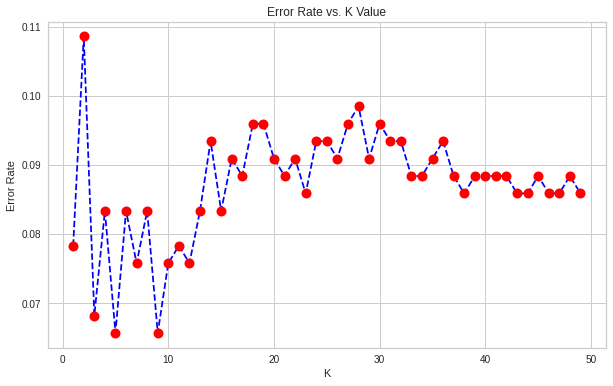

Minimum error:- 0.06565656565656566 at K = 4


In [473]:
# Finding the minimum error in Knn for different values of n
error_rate = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9343434343434344 at K = 4


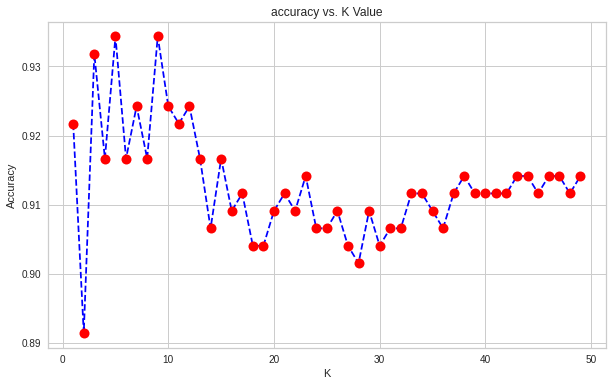

In [474]:
# Finding maxiumn accuracy at different values of n
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [475]:
# model scoring at n = 6

knn = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
knn.score(X_test, y_test)


0.9166666666666666

In [476]:
# importances = pd.DataFrame({
#     'Feature': new_df.drop('price_range', axis=1).columns,
#     'Importance': knn.feature_importances_

# })
# importances = importances.sort_values(by='Importance', ascending=False)
# importances = importances.set_index('Feature')
# importances

In [477]:
# using cross validation on knn and finding model score

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=6)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(f'cv_scores mean:{np.mean(cv_scores)}')
# print(classification_report(y_test, pipe.predict(X_test)))

[0.91161616 0.92929293 0.91161616 0.91161616 0.89646465]
cv_scores mean:0.9121212121212121


In [478]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors" : np.arange(1,50),
              "leaf_size" : np.arange(1,50)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
random_search = RandomizedSearchCV(knn, knn_params, cv=cv, random_state=1, n_jobs=-1, verbose=2 )
#grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=2)
pipe = make_pipeline(random_search)
pipe.fit(X_train, y_train)
print('                 Classification report \n')

print(classification_report(y_test, pipe.predict(X_test)))

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.7s


                 Classification report 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       107
           1       0.87      0.86      0.86        97
           2       0.85      0.83      0.84        86
           3       0.96      0.92      0.94       106

    accuracy                           0.90       396
   macro avg       0.90      0.90      0.90       396
weighted avg       0.90      0.90      0.90       396



[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.4s finished


In [479]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [480]:
rfc.score(X_test,y_test)


0.8661616161616161

In [481]:
importances = pd.DataFrame({
    'Feature': new_df.drop('price_range', axis=1).columns,
    'Importance': rfc.feature_importances_

})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
ram,0.441073
battery_power,0.066752
pixel_area,0.050386
px_width,0.047809
px_height,0.043739
mobile_wt,0.037272
int_memory,0.035513
area,0.030790
pc,0.029545


In [482]:
from xgboost import XGBClassifier
import time



xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 89.14
Time consumed for training: 0.537
Time consumed for prediction: 0.00600 seconds


In [483]:
importances = pd.DataFrame({
    'Feature': new_df.drop('price_range', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
ram,0.325332
battery_power,0.095110
pixel_area,0.092899
dual_sim,0.080805
px_height,0.048456
px_width,0.042753
mobile_wt,0.034991
fc,0.032179
int_memory,0.030437


In [484]:
# for categorical response and categorical predictor

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# data = pd.read_csv("D://Blogs//train.csv")
X = new_df[['blue','dual_sim','four_g','three_g','3G 4G', 'touch_screen', 'n_cores','wifi']]  #independent columns
y = new_df['price_range']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(21,'Score')) 

          Specs     Score
6       n_cores  8.224569
5  touch_screen  2.000355
2        four_g  1.853379
1      dual_sim  0.600599
0          blue  0.479060
7          wifi  0.403716
3       three_g  0.352030
4         3G 4G  0.352030


In [485]:
new_df[continuous_variables].columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'price_range'],
      dtype='object')

In [486]:
new_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', '3G 4G', 'area', 'pixel_area'],
      dtype='object')

In [487]:
new_df[new_continuous_variables].columns

Index(['battery_power', 'clock_speed', 'pc', 'fc', 'area', 'pixel_area',
       'int_memory', 'm_dep', 'mobile_wt', 'ram', 'talk_time', 'price_range'],
      dtype='object')

In [488]:
# For categorical response and continuous predictor
X = new_df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time','area', 'pixel_area']]


Y = new_df['price_range']



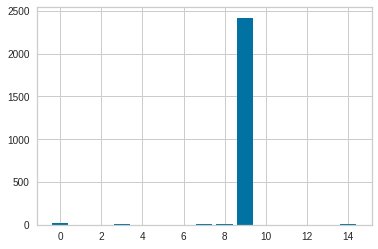

            Specs        Score
9             ram  2419.443534
0   battery_power    24.641800
8        px_width    13.718777
14     pixel_area    13.524039
7       px_height    10.426165
3      int_memory     4.066940
4           m_dep     2.673142
5       mobile_wt     1.980453
12      talk_time     1.902398
11           sc_w     1.483696
10           sc_h     1.160781
13           area     0.786269
6              pc     0.636563
1     clock_speed     0.584822
2              fc     0.509259


In [489]:

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
# X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
# for i in range(len(fs.scores_)):
# 	print('Feature %d: %f' % (i, fs.scores_[i]))
dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(X.columns)
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
# print(featureScores)
print(featureScores.nlargest(21,'Score')) 

### SVM 

In [536]:
y = new_df["price_range"].values
x_data=new_df.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [537]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.9678030303030303
test accuracy: 0.8232323232323232


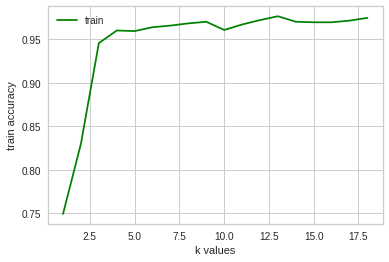

In [538]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,19,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In [539]:
d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.9766414141414141
max accuracy id: 12


In [540]:
print(" max accuracy values: \n", df.iloc[13])


 max accuracy values: 
 best features number    14.000000
train_score              0.970328
Name: 13, dtype: float64


In [552]:
selector = SelectKBest(f_classif, k = 13)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'blue' 'fc' 'four_g' 'n_cores' 'pc' 'px_height'
 'px_width' 'ram' 'sc_h' 'talk_time' 'area' 'pixel_area']
x test features: ['battery_power' 'blue' 'fc' 'four_g' 'n_cores' 'pc' 'px_height'
 'px_width' 'ram' 'sc_h' 'talk_time' 'area' 'pixel_area']


In [541]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [543]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9419079183803856
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


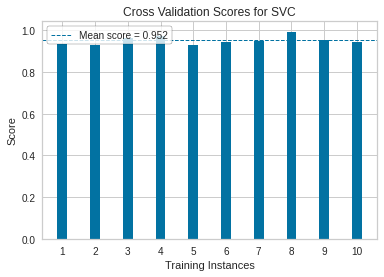

In [544]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1), ax=ax, cv=cv, scoring='accuracy'
)
oz.fit(x_new, y_train)
oz.poof()

In [545]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)

In [546]:
svm_model.fit(x_train,y_train)


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [547]:
print("train_accuracy:",svm_model.score(x_train,y_train))
print("test_accuracy: ", svm_model.score(x_test,y_test))

train_accuracy: 0.9728535353535354
test_accuracy:  0.9444444444444444


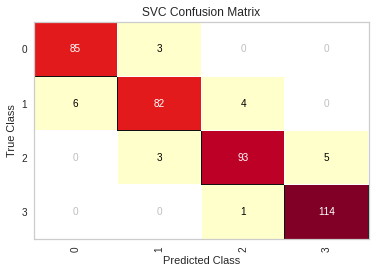

In [550]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3]
)

cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()

In [ ]:
print('\nTest results:')
print('ROCAUC score:', roc_auc_score(y_test, svc_y_predict))
print('Recall score:',recall_score(y_test, svc_y_predict))
print('\n', classification_report(y_test, svc_y_predict))

In [551]:
from sklearn.metrics import classification_report


y_pred = svm_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        88
           1       0.93      0.89      0.91        92
           2       0.95      0.92      0.93       101
           3       0.96      0.99      0.97       115

    accuracy                           0.94       396
   macro avg       0.94      0.94      0.94       396
weighted avg       0.94      0.94      0.94       396



In [503]:
# classification_report(y_test, svm_model.predict(y_test))

### Naive Bayes 

In [504]:
from sklearn.naive_bayes import MultinomialNB as nb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
# from sklearn import cross_validation, metrics

In [505]:
y = new_df["price_range"].values
x_data=new_df.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [506]:
from sklearn.svm import SVC
# NB=nb(random_state=1)
# nb.fit(x_train,y_train)
# print("train accuracy:",nb.score(x_train,y_train))
# print("test accuracy:",nb.score(x_test,y_test))

In [507]:
NBclassifier = Pipeline([('clf', MultinomialNB()),
])
NBclassifier.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [508]:
dtrain_predictions = NBclassifier.predict_proba(x_train)

#Predict testing set:
y_pred_proba = NBclassifier.predict_proba(x_test)

#Perform cross-validation:
# cv_score = cross_validation.cross_val_score(NBclassifier, x_train, y_train, cv=5, scoring='roc_auc')  

In [509]:
X = new_df.drop(["price_range"], axis=1)
y = new_df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [510]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [511]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [512]:
y_pred = gnb.predict(X_test)

# y_pred

In [513]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7904


In [514]:
y_pred_train = gnb.predict(X_train)

In [515]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8125


In [516]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8125
Test set score: 0.7904


In [517]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[101   6   0   0]
 [  6  69  22   0]
 [  0  26  56   4]
 [  0   0  19  87]]

True Positives(TP) =  101

True Negatives(TN) =  69

False Positives(FP) =  6

False Negatives(FN) =  6


In [518]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       107
           1       0.68      0.71      0.70        97
           2       0.58      0.65      0.61        86
           3       0.96      0.82      0.88       106

    accuracy                           0.79       396
   macro avg       0.79      0.78      0.78       396
weighted avg       0.80      0.79      0.80       396



In [519]:
nb_classifier = MultinomialNB()


In [520]:
k_fold = StratifiedKFold(n_splits = 10)
scores = cross_val_score(nb_classifier, X_train, y_train, cv = k_fold)
print("mean:" , scores.mean(), "std:", scores.std())

mean: nan std: nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this 